## KNN

___

In [96]:
# !pip install scikit-learn

In [97]:
import sklearn
sklearn.__version__

'1.1.1'

In [98]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### 데이터 읽기

In [99]:
citrus = pd.read_csv('./datasets/citrus.csv')
citrus.shape

(10000, 6)

In [100]:
citrus.head()  # 분류에선 target = class or label

,name,diameter,weight,red,green,blue
0,orange,2.96,86.76,172,85,2
1,orange,3.91,88.05,166,78,3
2,orange,4.42,95.17,156,81,2
3,orange,4.47,95.60,163,81,4
4,orange,4.48,95.76,161,72,9


In [101]:
citrus['name'].unique()  # name 데이터 확인

array(['orange', 'grapefruit'], dtype=object)

In [102]:
citrus.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      10000 non-null  object 
 1   diameter  10000 non-null  float64
 2   weight    10000 non-null  float64
 3   red       10000 non-null  int64  
 4   green     10000 non-null  int64  
 5   blue      10000 non-null  int64  
dtypes: float64(2), int64(3), object(1)
memory usage: 468.9+ KB


In [103]:
citrus.isna().sum(axis=0)

name        0
diameter    0
weight      0
red         0
green       0
blue        0
dtype: int64

In [104]:
citrus[citrus.duplicated()]  # 중복 데이터 확인

,name,diameter,weight,red,green,blue


In [105]:
# name 의 데이터 비율 확인
citrus['name'].value_counts()

orange        5000
grapefruit    5000
Name: name, dtype: int64

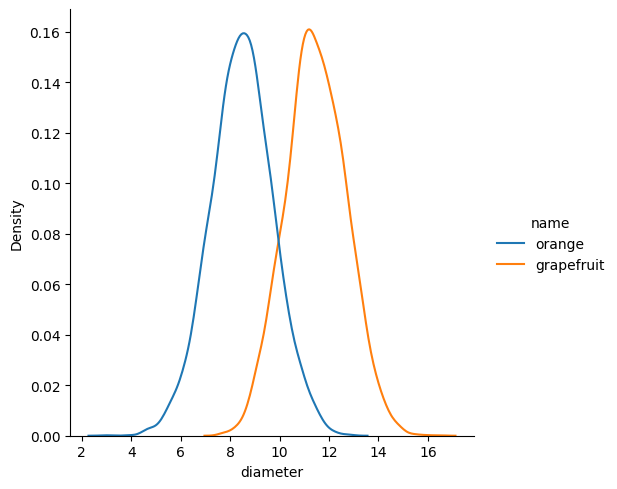

In [106]:
sns.displot(data=citrus, x='diameter', hue='name', kind='kde')

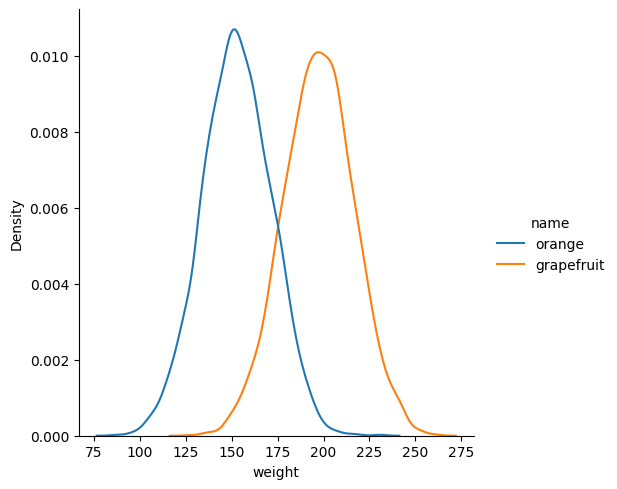

In [107]:
sns.displot(data=citrus, x='weight', hue='name', kind='kde')

## 데이터 전처리

In [108]:
dff = citrus.copy()

In [109]:
dff.head()

,name,diameter,weight,red,green,blue
0,orange,2.96,86.76,172,85,2
1,orange,3.91,88.05,166,78,3
2,orange,4.42,95.17,156,81,2
3,orange,4.47,95.60,163,81,4
4,orange,4.48,95.76,161,72,9


### 레이블 인코딩

map() 사용 or package 사용

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html

In [110]:
citrus['name'].unique()

array(['orange', 'grapefruit'], dtype=object)

In [111]:
 dff['name'].map({'grapefruit':0, 'orange':1})

0       1
1       1
2       1
3       1
4       1
       ..
9995    0
9996    0
9997    0
9998    0
9999    0
Name: name, Length: 10000, dtype: int64

In [112]:
dff['name'].unique()

array(['orange', 'grapefruit'], dtype=object)

In [113]:
# scikit-Learn
# LabelEncoding

from sklearn.preprocessing import LabelEncoder  # 데이터 전처리하는 기능이 모여있는 패키지

le = LabelEncoder()
le.fit(dff['name'])  # fit - data 조사를 함 | predict?

dff['name'] = le.transform(dff['name']) # data 변환

# dff['name'] = le.fit_transform(df['name'])  한 줄로 사용하기

dff.head()

,name,diameter,weight,red,green,blue
0,1,2.96,86.76,172,85,2
1,1,3.91,88.05,166,78,3
2,1,4.42,95.17,156,81,2
3,1,4.47,95.60,163,81,4
4,1,4.48,95.76,161,72,9


In [114]:
le.classes_

array(['grapefruit', 'orange'], dtype=object)

In [115]:
dff.head()

,name,diameter,weight,red,green,blue
0,1,2.96,86.76,172,85,2
1,1,3.91,88.05,166,78,3
2,1,4.42,95.17,156,81,2
3,1,4.47,95.60,163,81,4
4,1,4.48,95.76,161,72,9


### 데이터 분리 (학습/테스트 데이터)

In [116]:
dff.head()

,name,diameter,weight,red,green,blue
0,1,2.96,86.76,172,85,2
1,1,3.91,88.05,166,78,3
2,1,4.42,95.17,156,81,2
3,1,4.47,95.60,163,81,4
4,1,4.48,95.76,161,72,9


In [117]:
# X, Y 분리

X = dff.iloc[:, 1:]
y = dff.iloc[:, 0]

In [118]:
X.shape

(10000, 5)

In [125]:
X, y = sklearn.utils.shuffle(X, y)
# shuffle 안해주면 현재 데이터가 순서대로 정렬되어 있어서 y_test 값에 grapefruit 만 존재하게 됨

In [126]:
# 학습/테스트 데이터 분리 (80:20)

## 슬라이싱 방법 1
# dx = int(dff.shape[0] * 0.8)

# X_train = X.iloc[:idx, :]
# X_test = X.iloc[idx: , :]

# y_train = y[:idx]
# y_test = y[idx:]

In [132]:
## 슬라이싱 방법 2 -> 주로 사용

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2022, stratify = y, shuffle=True)

# shuffle 후 random 으로 뽑아서 80:20 비율로 나눠줌, X와 y 값이 너무 많이 차이나면 stratify 를 사용하여 잘 배분될 수 있도록 함

In [133]:
X_train.shape, X_test.shape

((8000, 5), (2000, 5))

In [134]:
y_train.shape, y_test.shape

((8000,), (2000,))

In [135]:
y_test.value_counts()

1    1000
0    1000
Name: name, dtype: int64

### 스케일링

In [136]:
# 표준화

# m = X_train['diameter'].mean()
# s = X_train['diameter'].std()
# z = (X_train['diameter'] - m) / s

# 코드가 너무 김

In [139]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(X_train)
X_train_scaled = ss.transform(X_train)  # ndarray 타입 반환 (dataframe 타입이 아님)

X_train_scaled[:5]

array([[-0.12825938, -0.09808758,  1.0754262 , -0.68180698, -1.03502694],
       [ 0.3881269 ,  0.35294918, -1.03666454, -1.27810857, -0.92457252],
       [-1.27980077, -1.27388189,  0.40339733,  0.34042432, -1.03502694],
       [-0.63431793, -0.63485576,  1.17143033, -0.93736481,  0.29042609],
       [-0.21088118, -0.1845076 ,  0.01938083,  1.10709779, -0.70366369]])

In [141]:
y_train = y_train.to_numpy()
# y_train = y_train.values

y_train

array([1, 0, 1, ..., 0, 0, 0])

### 모델 학습

In [159]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier() # default k = 5
clf.fit(X_train_scaled, y_train)

KNeighborsClassifier()

### 테스트

In [160]:
X_test.head()

,diameter,weight,red,green,blue
1034,7.47,137.76,161,78,2
5503,9.89,172.72,168,83,20
8233,11.93,204.76,164,52,2
8674,12.26,209.32,150,83,11
3226,8.93,159.85,152,88,13


In [161]:
X_test_scaled = ss.transform(X_test)  # ndarray 타입 반환 (dataframe 타입이 아님)

X_test_scaled[:5]

array([[-1.29529236, -1.28524388,  0.6914097 ,  0.17005244, -1.03502694],
       [-0.04563757, -0.08156105,  1.36343857,  0.59598214,  0.95315261],
       [ 1.00779043,  1.02158535,  0.97942208, -2.04478205, -1.03502694],
       [ 1.1781979 ,  1.17858746, -0.36463567,  0.59598214, -0.04093717],
       [-0.5413684 , -0.52467884, -0.17262742,  1.02191185,  0.17997167]])

In [162]:
# 예측 y_test
y_pred = clf.predict(X_test_scaled)

In [163]:
y_pred[:10]

array([1, 1, 0, 0, 1, 0, 1, 1, 0, 1])

In [164]:
y_test[:10]

1034    1
5503    0
8233    0
8674    0
3226    1
4652    1
4066    1
3302    1
7373    0
1310    1
Name: name, dtype: int32

In [165]:
# 정확도
(y_pred==y_test).sum()/X_test.shape[0]

0.917

### 평가

In [167]:
from sklearn.metrics import confusion_matrix

cfm = confusion_matrix(y_test, y_pred)
cfm

array([[922,  78],
       [ 88, 912]], dtype=int64)

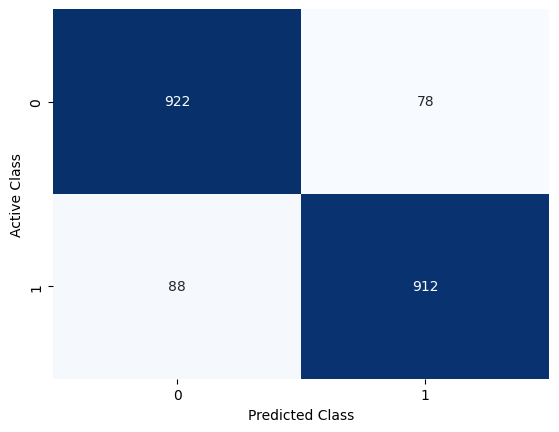

In [175]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.heatmap(cfm, annot=True, fmt='g', cbar=False, cmap='Blues')  # annot: 숫자 표시, fmt: 숫자 포맷 (해당 코드는 int형), cbar: 컬러바 추가/제거
plt.ylabel("Active Class")
plt.xlabel("Predicted Class")
plt.show()

In [179]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

def print_score(y_true, y_pred):
    # 정확도
    print(f'정확도: {accuracy_score(y_true, y_pred)}')
    # 정밀도
    print(f'정밀도 : {precision_score(y_true, y_pred)}')
    # 재현율
    print(f'재현율 : {recall_score(y_true, y_pred)}')

In [180]:
print_score(y_test, y_pred)

정확도: 0.917
정밀도 : 0.9212121212121213
재현율 : 0.912


In [181]:
X_train.shape

(8000, 5)

In [207]:
hist = []

for k in range(3, 50):
    # 새로운 모델 k 값을
    # 학습
    # 예측 정확도
    clf = KNeighborsClassifier(n_neighbors = k) # default k = 5
    clf.fit(X_train_scaled, y_train)
    y_pred = clf.predict(X_test_scaled)
    hist.append(accuracy_score(y_test, y_pred))

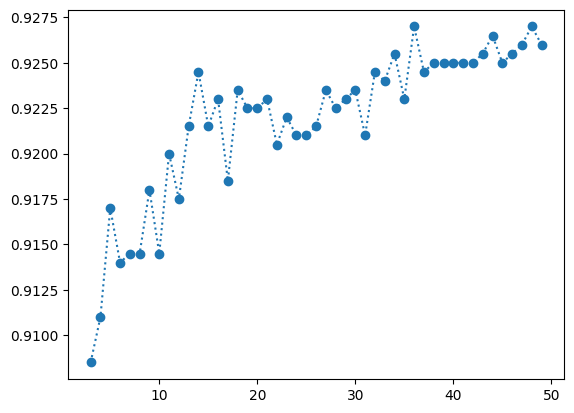

In [218]:
plt.plot(range(3, 50), hist, 'o:')
plt.show()

In [219]:
hist.index(max(hist))

33

In [220]:
np.argmax(hist)

33

### K-Fold

In [221]:
X_train_scaled.shape

(8000, 5)

In [250]:
from sklearn.model_selection import KFold

kf = KFold(n_splits = 5, shuffle = True, random_state = 2022)  # 5개로 나눠서 검증하면서 학습
result = []

# cross_val_score 함수와 동일한 기능
for k in range(3, 50):
    acc_scores = []
    for train_idx, validation_idx in kf.split(X_train_scaled):
        train_x, validation_x = X_train_scaled[train_idx], X_train_scaled[validation_idx]
        train_y, validation_y = y_train[train_idx], y_train[validation_idx]

        model = KNeighborsClassifier(n_neighbors = k) # default k = 5
        model.fit(train_x, train_y)
        y_pred = model.predict(validation_x)
        acc_scores.append(accuracy_score(validation_y, y_pred))
    result.append(np.array(acc_scores).mean())
#    print("정확도 : ", np.array(acc_scores).mean())    

In [245]:
np.argmax(result)

26

In [252]:
!pip install tqdm

     ---------------------------------------- 78.4/78.4 kB 4.3 MB/s eta 0:00:00


Error processing line 1 of C:\Users\042\miniconda3\envs\myml\lib\site-packages\matplotlib-3.5.2-py3.8-nspkg.pth:

  Traceback (most recent call last):
    File "C:\Users\042\miniconda3\envs\myml\lib\site.py", line 169, in addpackage
      exec(line)
    File "<string>", line 1, in <module>
    File "<frozen importlib._bootstrap>", line 553, in module_from_spec
  AttributeError: 'NoneType' object has no attribute 'loader'

Remainder of file ignored


In [254]:
# 교차 검증 방법
from sklearn.model_selection import cross_val_score
from tqdm import tqdm

hist = []

for k in tqdm(range(3, 50)):
    model = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='accuracy')  # cv = cross validation, scoring -> 정확도로 설정
    
    hist.append(scores.mean())

100%|██████████████████████████████████████████████████████████████████████████████████| 47/47 [00:09<00:00,  4.92it/s]


In [251]:
np.argmax(hist)

45